## Data Analysis

In [1]:
# Import all the necessary libraries
# and set the appropriate options

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score

In [2]:
# load dataset
data = pd.read_csv('train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

The house price dataset contains 1460 rows, i.e., houses, and 81 columns, i.e., variables. 

### Missing values

Let's go ahead and find out which variables of the dataset contain missing values

In [3]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

LotFrontage 0.177  % missing values
Alley 0.938  % missing values
MasVnrType 0.005  % missing values
MasVnrArea 0.005  % missing values
BsmtQual 0.025  % missing values
BsmtCond 0.025  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.025  % missing values
BsmtFinType2 0.026  % missing values
Electrical 0.001  % missing values
FireplaceQu 0.473  % missing values
GarageType 0.055  % missing values
GarageYrBlt 0.055  % missing values
GarageFinish 0.055  % missing values
GarageQual 0.055  % missing values
GarageCond 0.055  % missing values
PoolQC 0.995  % missing values
Fence 0.808  % missing values
MiscFeature 0.963  % missing values


#### Relationship between values being missing and Sale Price

Let's evaluate the price of the house for those cases where the information is missing, for each variable.

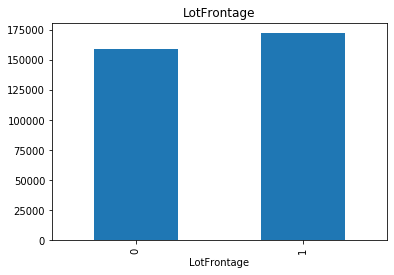

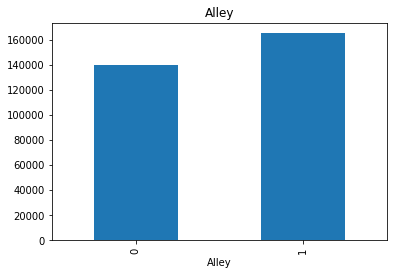

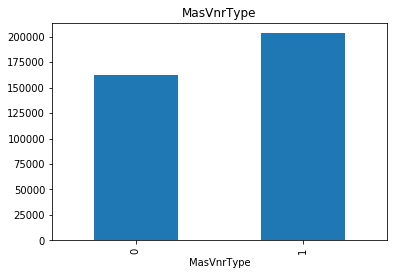

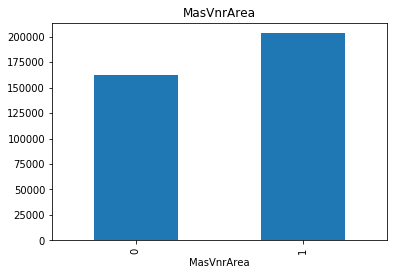

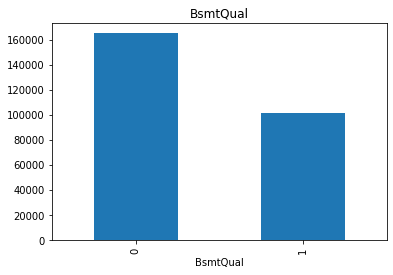

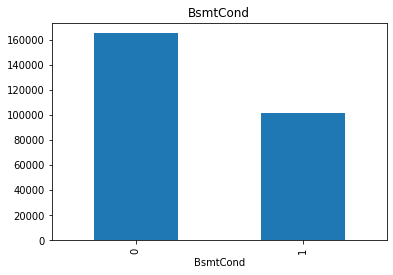

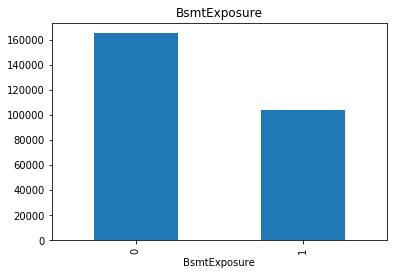

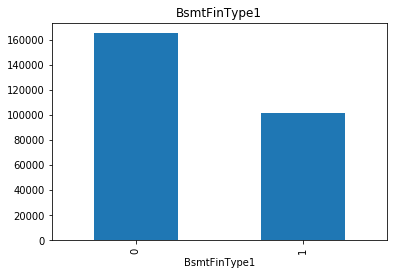

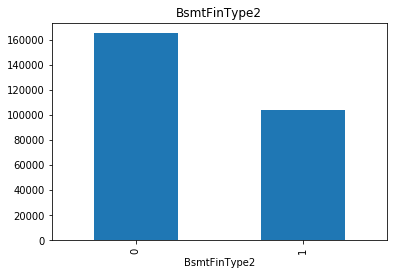

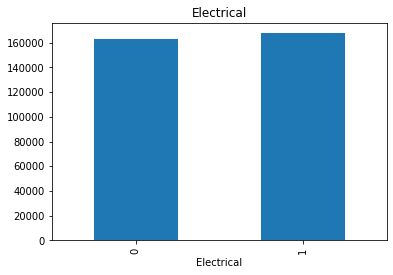

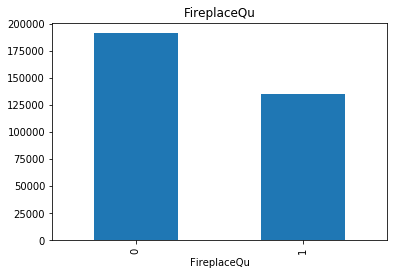

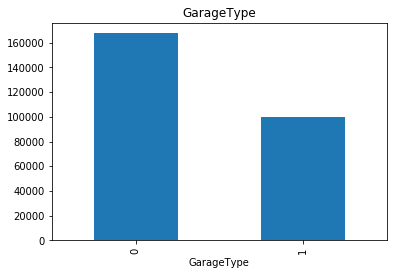

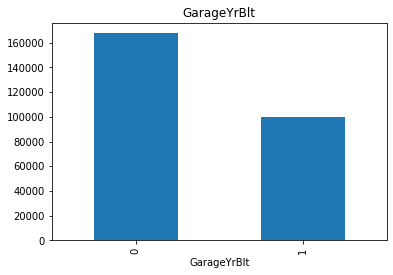

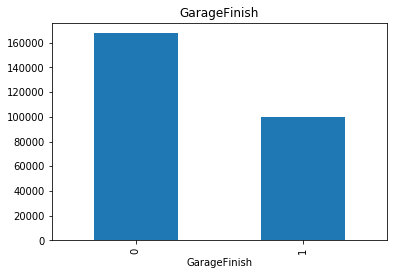

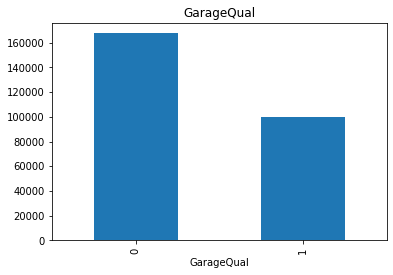

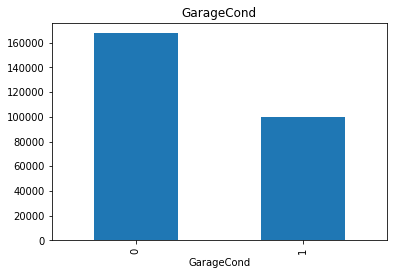

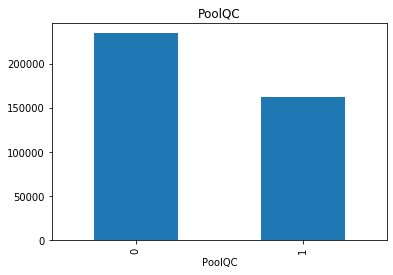

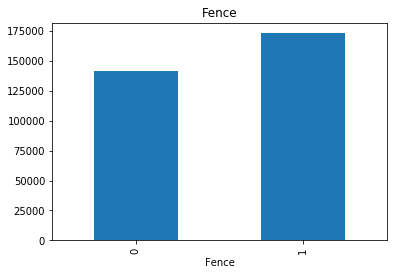

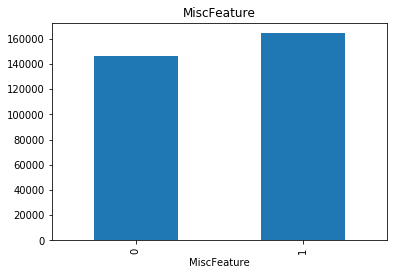

In [4]:
for var in vars_with_na:
    df = data.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()    

We see that the fact that the information is missing for those variables, is important. There is variation in median sale price for missing values.

### Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [5]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

From the above view of the dataset, we notice the variable Id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset. See below:

In [6]:
print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


#### Temporal variables

From the above view we also notice that we have 4 year variables. We will not use **date** variables as is, rather we extract information from them. For example, the difference in years between the year the house was built and the year the house was sold.

In [7]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
# let's explore the content of these year variables
for var in year_vars:
    print(var, ":", data[var].unique())
    print()

YearBuilt : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 196

As you can see, it refers to years.

We can also explore the evolution of the sale price with the years in which the house was sold:

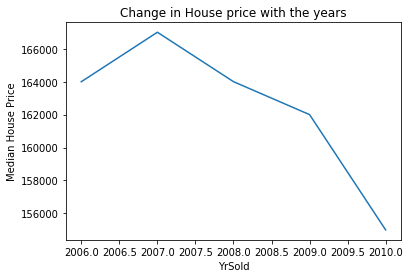

In [9]:
data.groupby('YrSold')['SalePrice'].median().plot();
plt.ylabel('Median House Price');
plt.title('Change in House price with the years');

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.


Let's go ahead and explore whether there is a relationship between the year variables and SalePrice. For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

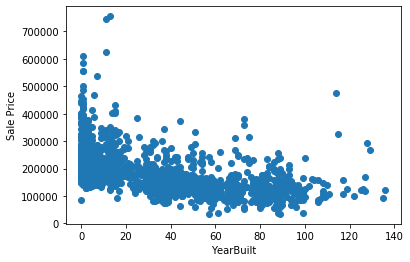

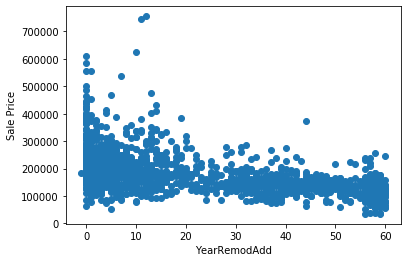

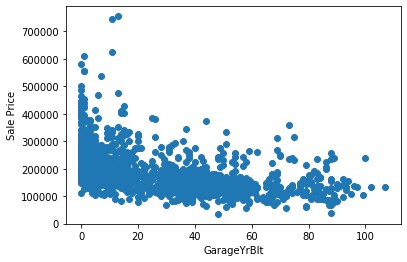

In [10]:
# let's explore the relationship between the year variables and the house price in a bit of more details
for var in year_vars:
    if var!='YrSold':
        df = data.copy()
        # capture difference between year variable and year the house was sold
        df[var] = df['YrSold'] - df[var]
        
        plt.scatter(df[var], df['SalePrice'])
        plt.ylabel('Sale Price')
        plt.xlabel(var)
        plt.show()

We see that there is a tendency to a decrease in price, with older features.

#### Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [11]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20 and var not in year_vars+['Id']]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  14


In [12]:
# let's visualise the discrete variables
data[discrete_vars].head()

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0          60            7            5             1             0         2   
1          20            6            8             0             1         2   
2          60            7            5             1             0         2   
3          70            7            5             1             0         1   
4          60            8            5             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   PoolArea  MoSold  
0         0       2  
1         0       5  
2         0       9  
3         0       2  
4         0      12

We can see that these variables tend to be Qualifications or grading scales, or refer to the number of rooms, or units. Let's go ahead and analyse their contribution to the house price.

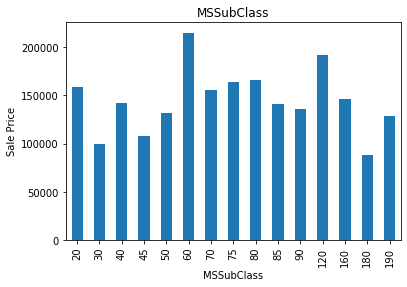

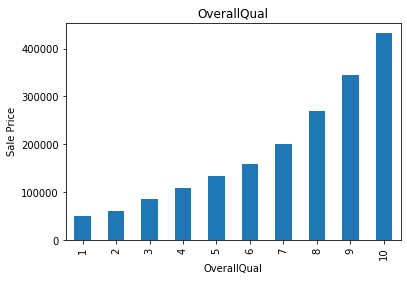

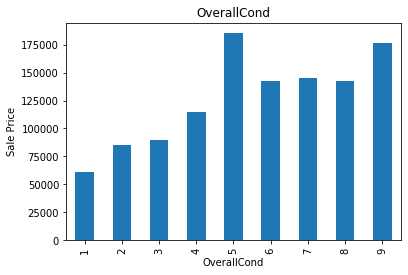

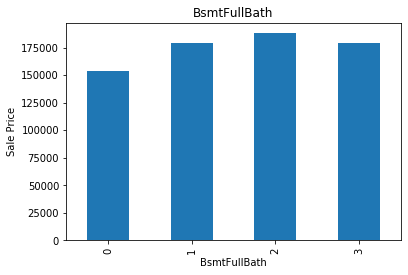

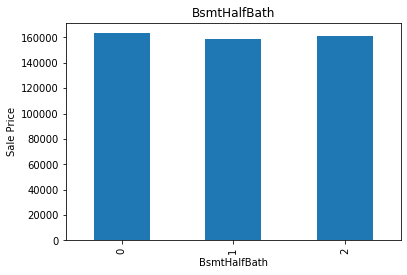

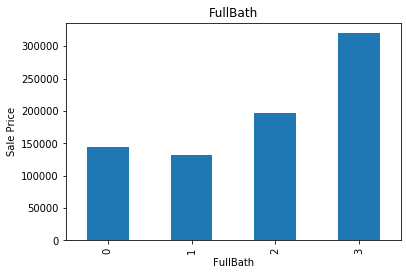

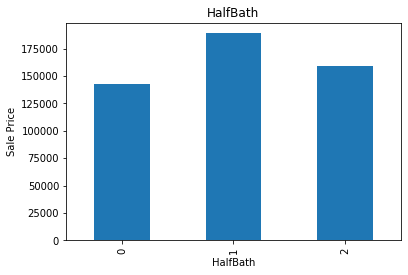

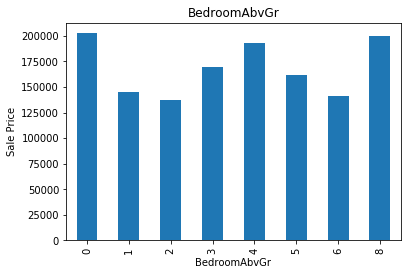

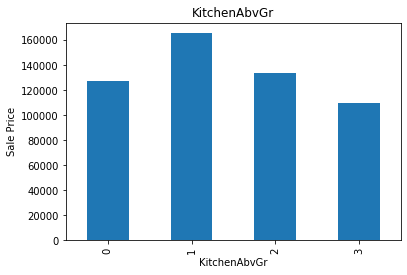

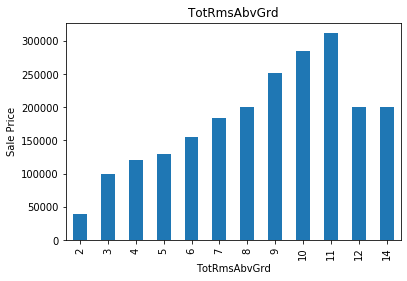

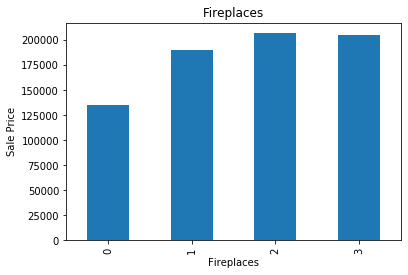

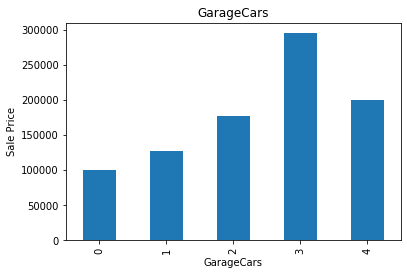

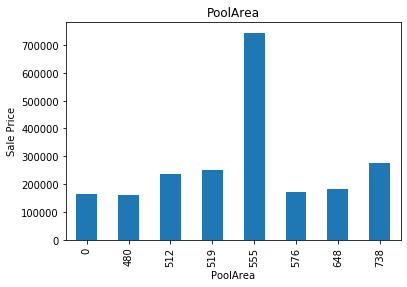

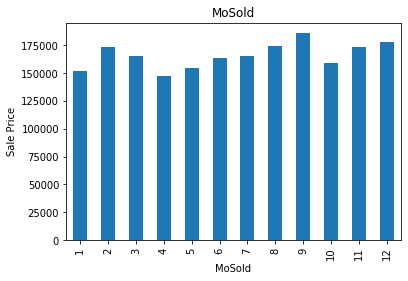

In [13]:
for var in discrete_vars:
    df = data.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Sale Price')
    plt.show()

We see that there is a relationship between the variable numbers and the SalePrice, but this relationship is not always monotonic. 

For example, for **OverallQual**, there is a monotonic relationship: the higher the quality, the higher the SalePrice.  

However, for **OverallCond**, the relationship is not monotonic. Clearly, some Condition grades, like 5, favour better selling prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables.

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous all those that are not temporal or discrete variables in our dataset.

In [14]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  19


In [15]:
# let's visualise the continuous variables
data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

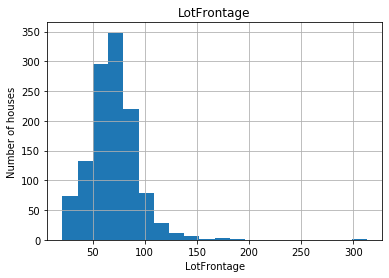

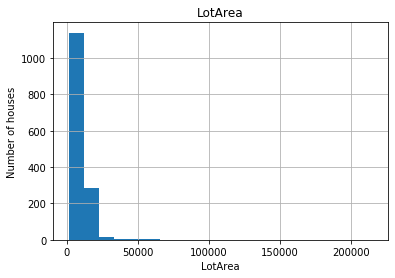

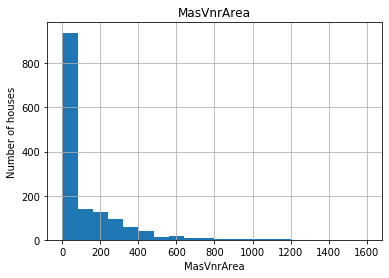

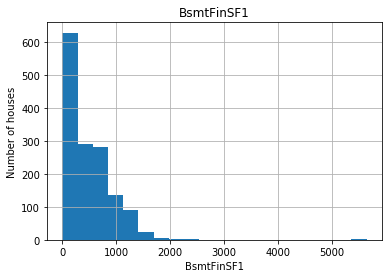

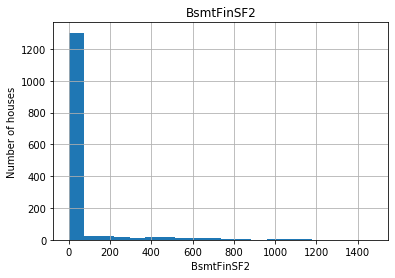

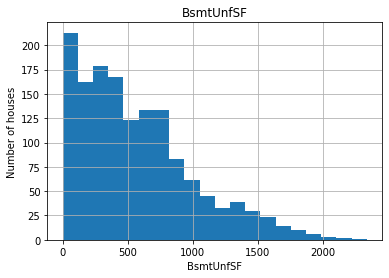

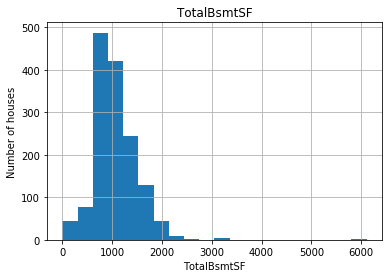

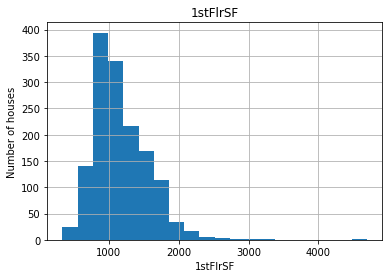

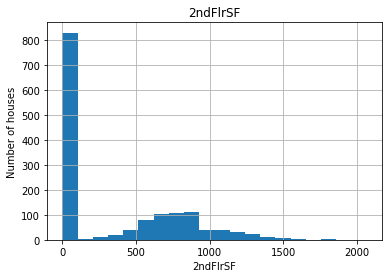

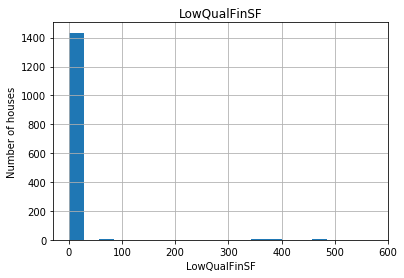

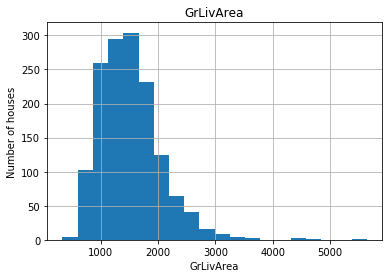

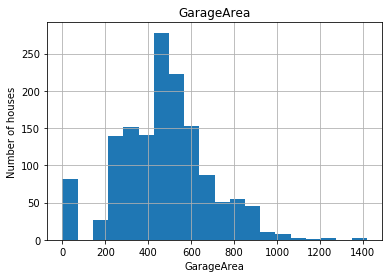

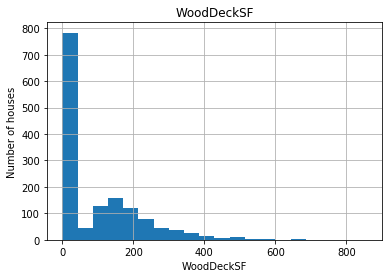

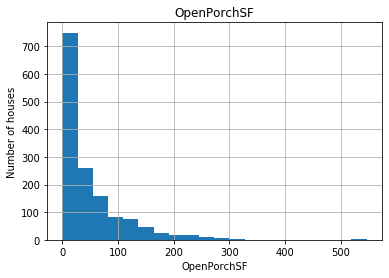

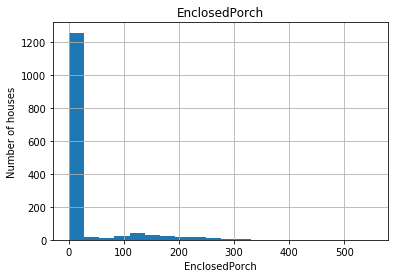

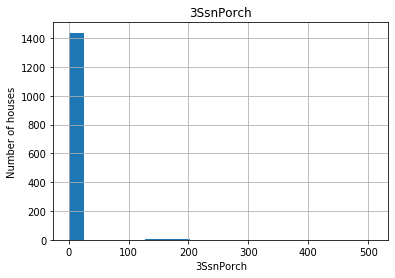

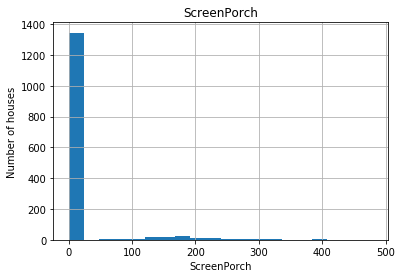

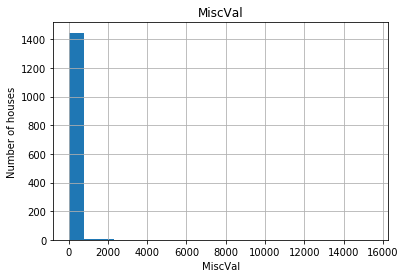

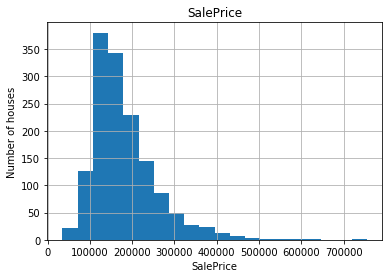

In [16]:
for var in cont_vars:
    df = data.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()

We see that all of the above variables, are not normally distributed, including the target variable 'SalePrice'. For linear models to perform best, we need to account for skewed distributions.

Let's also evaluate here if a log transformation renders the variables more like Normal distribution:

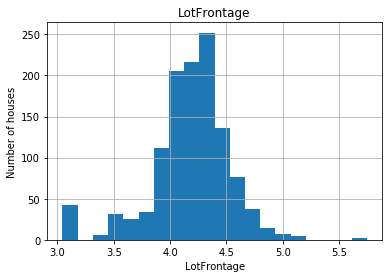

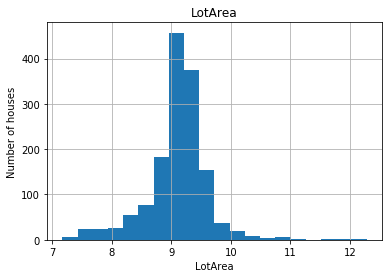

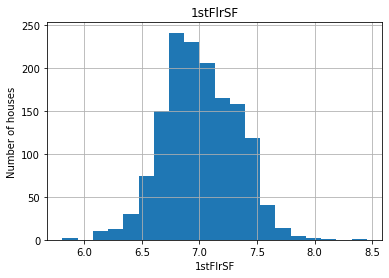

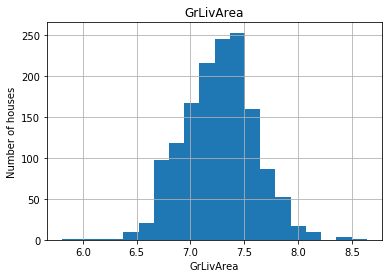

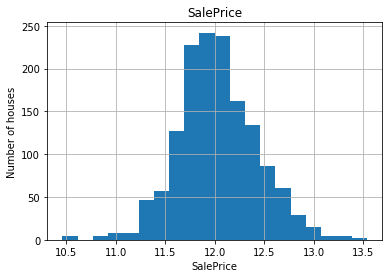

In [17]:
for var in cont_vars:
    df = data.copy()
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()

We get a better spread of values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

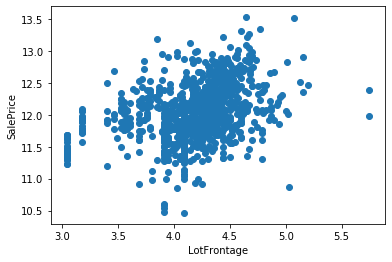

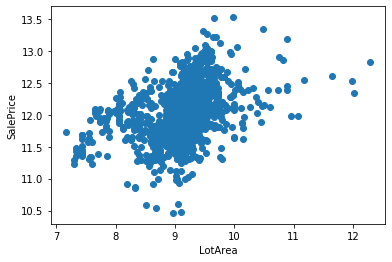

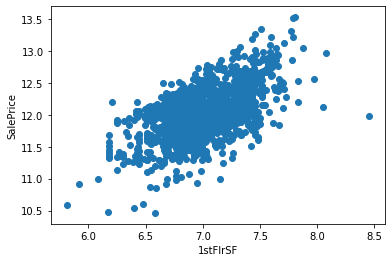

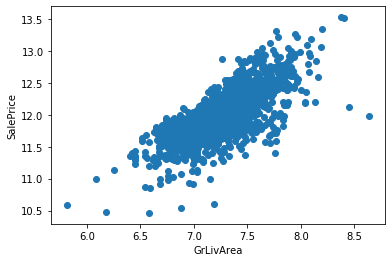

In [18]:
# let's explore the relationship between the house price and the transformed variables
# with more detail

for var in cont_vars:
    if var!='SalePrice':
        df = data.copy()
        # log does not take negative values, so let's be careful and skip those variables
        if 0 in data[var].unique():
            pass
        else:
            # log transform
            df[var] = np.log(df[var])
            df['SalePrice'] = np.log(df['SalePrice'])
            plt.scatter(df[var], df['SalePrice'])
            plt.ylabel('SalePrice')
            plt.xlabel(var)
            plt.show()  

From the above plots, we observe some monotonic associations between SalePrice and the variables to which we applied the log transformation, for example **'GrLivArea'**.

#### Outliers
Let's make boxplots to visualise outliers in the continuous variables.

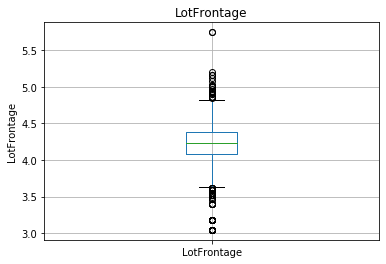

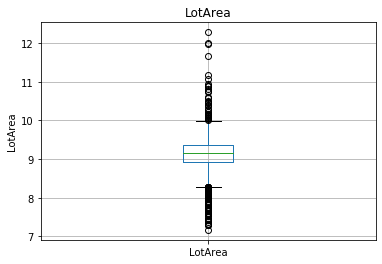

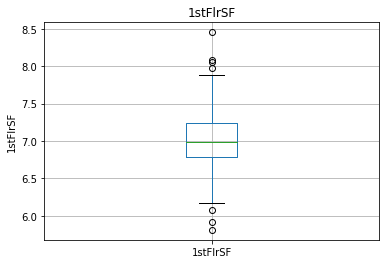

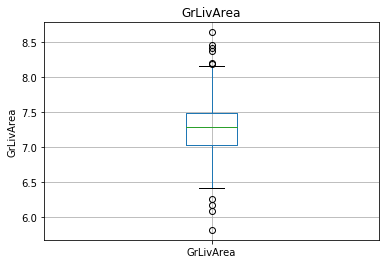

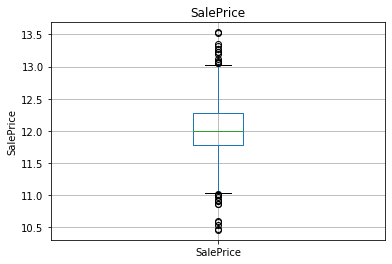

In [19]:
for var in cont_vars:
    df = data.copy()
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()

The majority of the continuous variables seem to contain outliers. We are deciding to keep all the observations for model training as we do not have a lot of data points.

### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [20]:
## Categorical variables
cat_vars = [var for var in data.columns if data[var].dtypes=='O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  43


In [21]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

#### Number of labels / cardinality

Let's evaluate how many different categories are present in each of the variables.

In [22]:
for var in cat_vars:
    print(var, len(data[var].unique()), 'categories')

MSZoning 5 categories
Street 2 categories
Alley 3 categories
LotShape 4 categories
LandContour 4 categories
Utilities 2 categories
LotConfig 5 categories
LandSlope 3 categories
Neighborhood 25 categories
Condition1 9 categories
Condition2 8 categories
BldgType 5 categories
HouseStyle 8 categories
RoofStyle 6 categories
RoofMatl 8 categories
Exterior1st 15 categories
Exterior2nd 16 categories
MasVnrType 5 categories
ExterQual 4 categories
ExterCond 5 categories
Foundation 6 categories
BsmtQual 5 categories
BsmtCond 5 categories
BsmtExposure 5 categories
BsmtFinType1 7 categories
BsmtFinType2 7 categories
Heating 6 categories
HeatingQC 5 categories
CentralAir 2 categories
Electrical 6 categories
KitchenQual 4 categories
Functional 7 categories
FireplaceQu 6 categories
GarageType 7 categories
GarageFinish 4 categories
GarageQual 6 categories
GarageCond 6 categories
PavedDrive 3 categories
PoolQC 4 categories
Fence 5 categories
MiscFeature 5 categories
SaleType 9 categories
SaleCondition 6

All the categorical variables show low cardinality, this means that they have only few different labels.

#### Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [23]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()    

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical variables show multiple labels that are present in less than **1%** of the houses. We will engineer these variables. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

Finally, we will explore the relationship between the categories of the different variables and the house price:

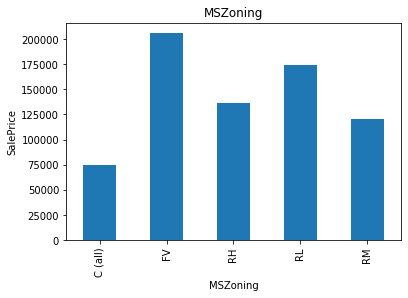

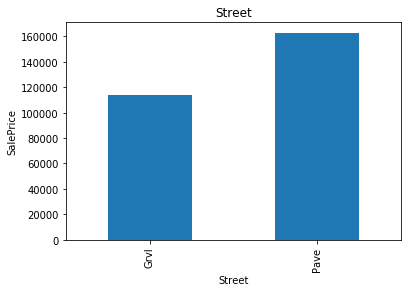

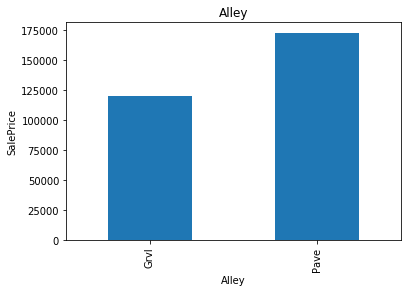

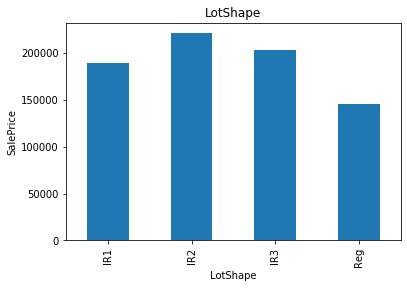

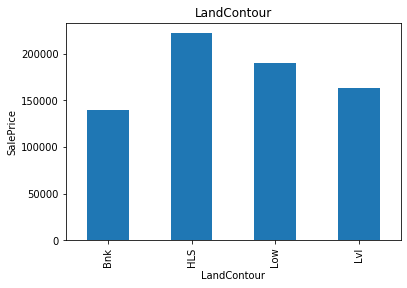

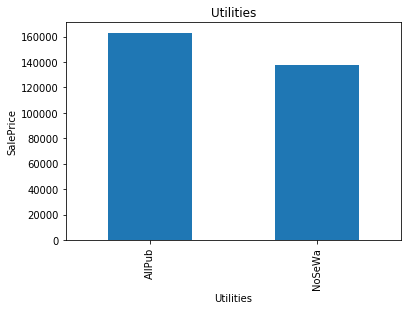

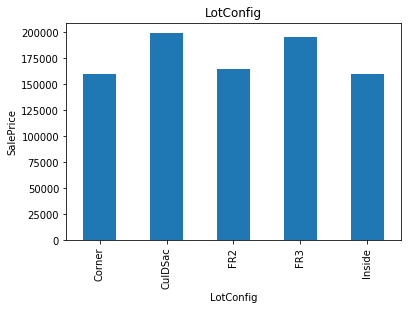

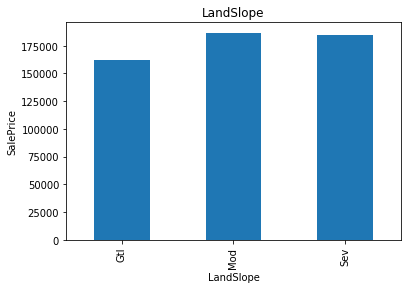

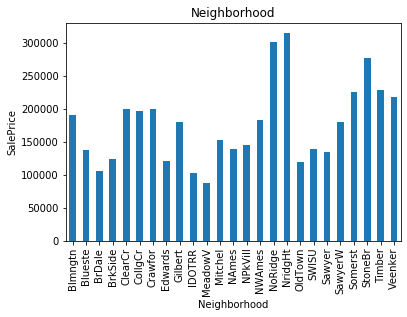

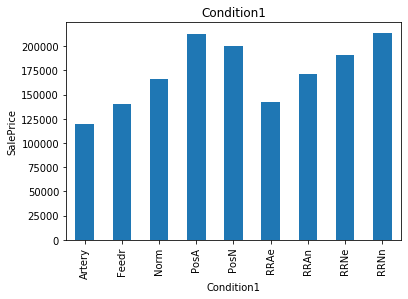

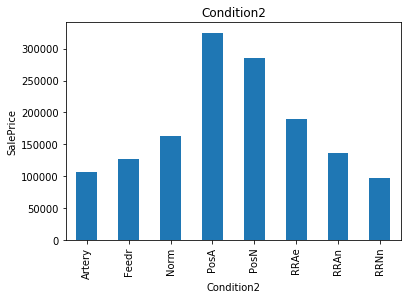

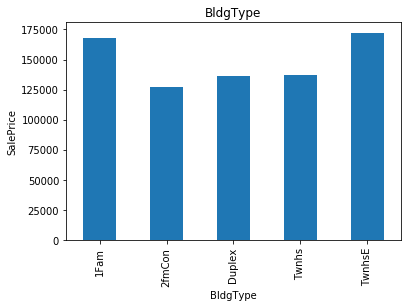

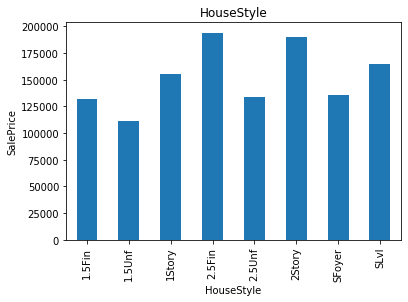

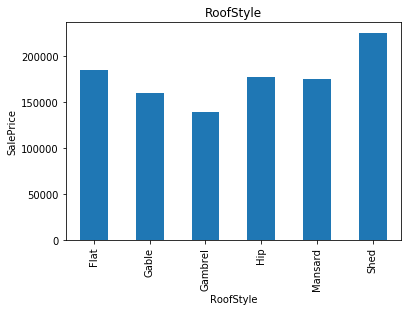

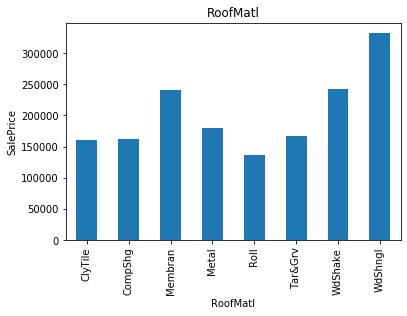

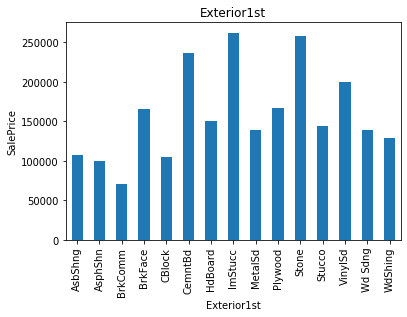

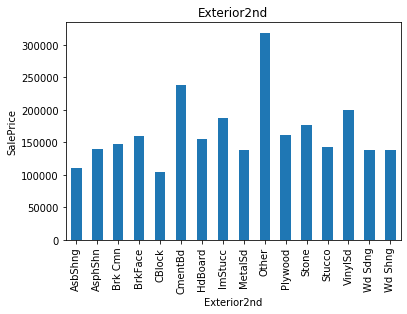

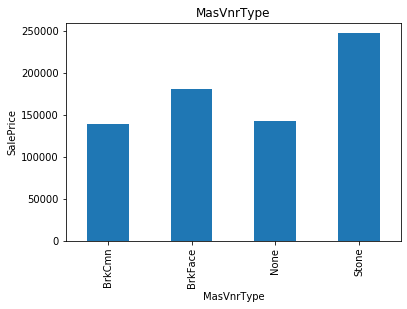

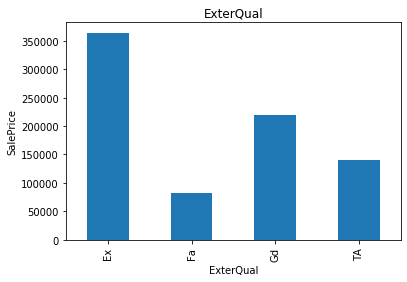

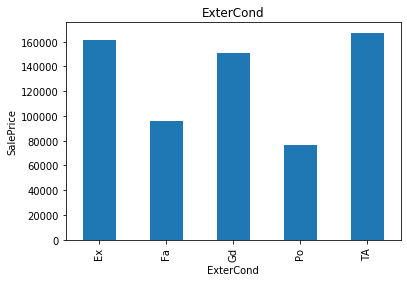

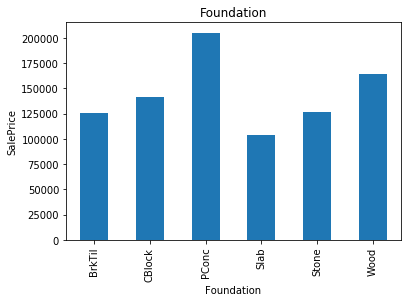

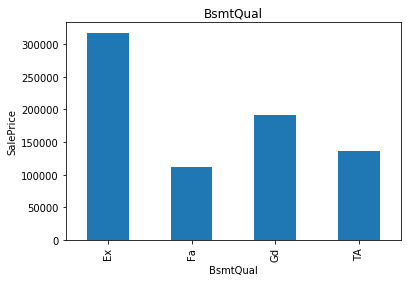

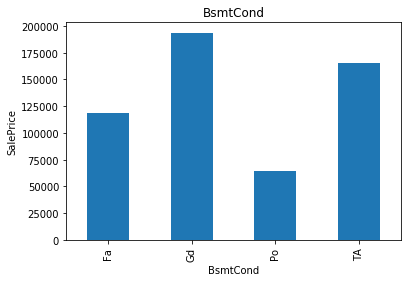

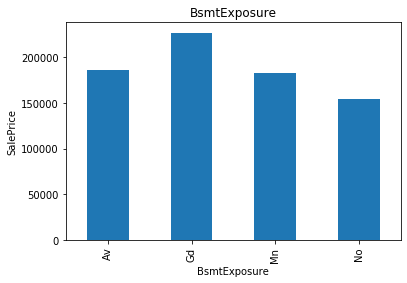

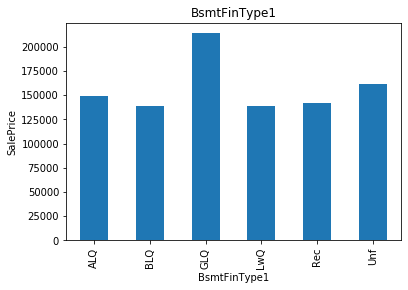

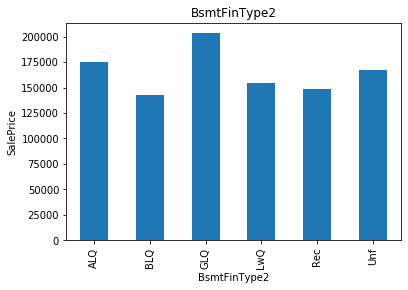

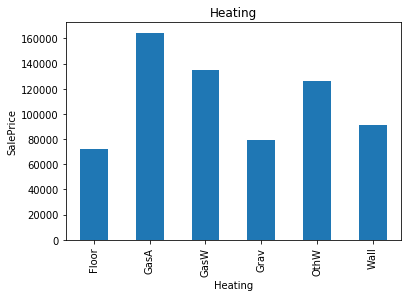

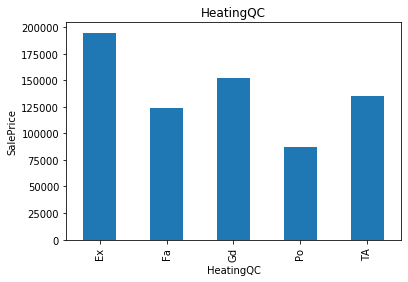

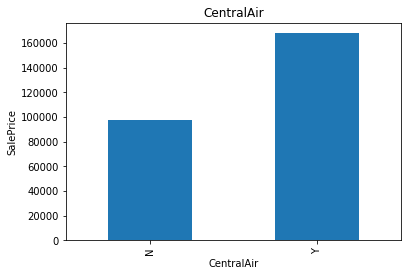

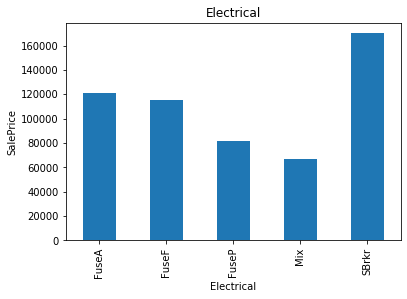

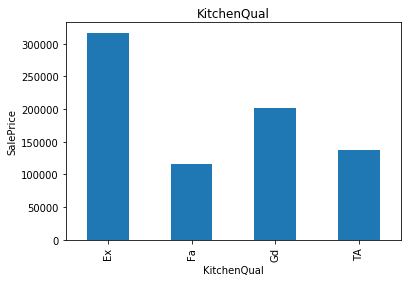

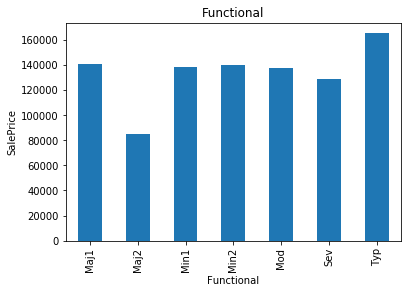

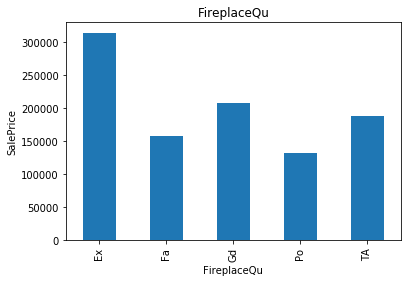

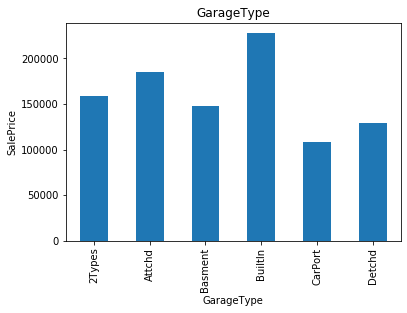

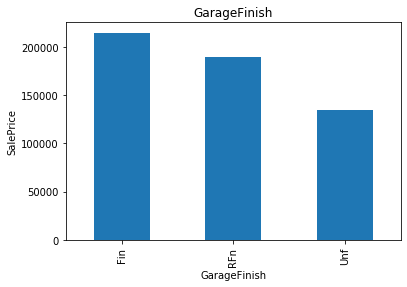

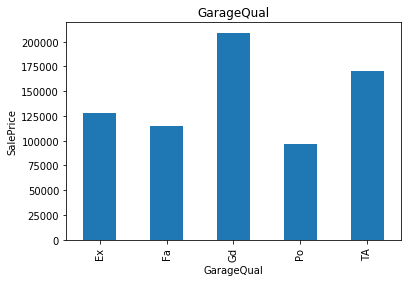

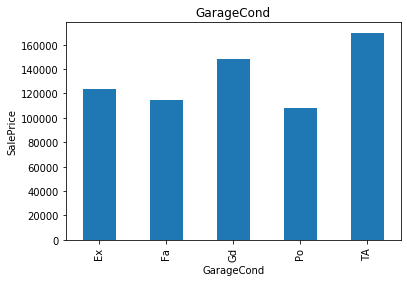

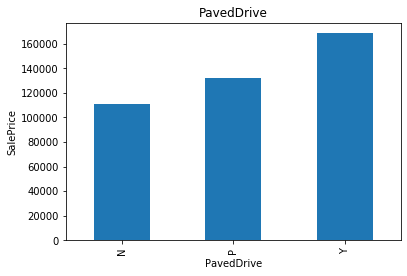

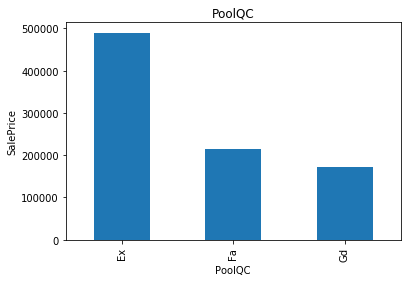

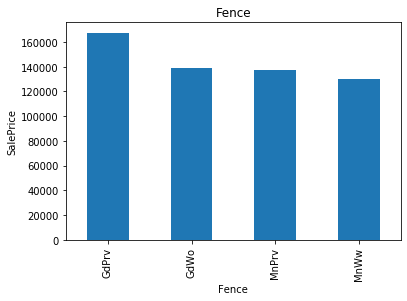

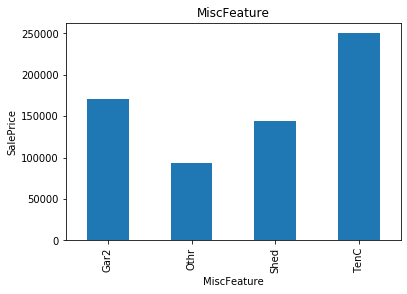

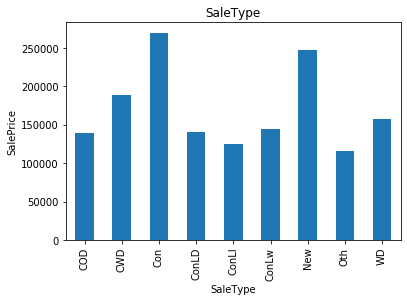

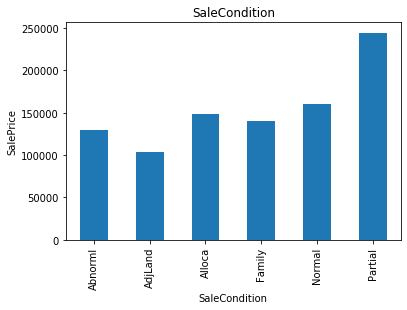

In [24]:
for var in cat_vars:
    df = data.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()

Clearly, the categories give information on the SalePrice.

## Feature Engineering

### Separate dataset into train and test

Before beginning to engineer our features, it is important to separate our data intro training and testing set. This is to avoid over-fitting.

In [25]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice,
                                                    test_size=0.1,
                                                    random_state=0)
X_train.shape, X_test.shape

((1314, 81), (146, 81))

### Missing values

For categorical variables, we will fill missing information by adding an additional category: "missing"

In [26]:
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [27]:
# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>0 and X_train[var].dtypes=='O']

# replace missing values with new label: "Missing"
X_train = fill_categorical_na(X_train, vars_with_na)
X_test = fill_categorical_na(X_test, vars_with_na)

# check that we have no missing information in the engineered variables
X_train[vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

For numerical variables, we are going to add an additional variable capturing the missing information, and then replace the missing information in the original variable by the mode, or most frequent value:

In [28]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>0 and X_train[var].dtypes!='O']

In [29]:
# replace the missing values
for var in vars_with_na:
    
    # calculate the mode
    mode_val = X_train[var].mode()[0]
    
    # train
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_train[var].fillna(mode_val, inplace=True)
    
    # test
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
    X_test[var].fillna(mode_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [30]:
# check that we have the added binary variables that capture missing information
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

LotFrontage_na  MasVnrArea_na  GarageYrBlt_na
930                0              0               0
656                0              0               0
45                 0              0               0
1348               1              0               0
55                 0              0               0

### Temporal variables

There are 4 variables that refer to the years in which something was built or something specific happened. We will capture the time elapsed between that variable and the year the house was sold:

In [31]:
# let's explore the relationship between the year variables and the house price in a bit of more details

def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [32]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [33]:
# check that test set does not contain null values in the engineered variables
[vr for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] if X_test[var].isnull().sum()>0]

[]

### Numerical variables

We will log transform the numerical variables that do not contain zeros in order to get a more Normal-like distribution.

In [34]:
for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']:
    X_train[var] = np.log(X_train[var])
    X_test[var]= np.log(X_test[var])

In [35]:
# check that test set does not contain null values in the engineered variables
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if X_test[var].isnull().sum()>0]

[]

In [36]:
# same for train set
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if X_train[var].isnull().sum()>0]

[]

### Categorical variables

First, we will remove those categories within variables that are present in less than 1% of the observations:

In [37]:
# let's capture the categorical variables first
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

Next, we need to transform the strings of these variables into numbers. We will do it so that we capture the monotonic relationship between the label and the target:

In [38]:
# this function will assign discrete values to the strings of the variables, 
# so that the smaller value corresponds to the smaller mean of target

def replace_categories(train, test, var, target):
    ordered_labels = train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [39]:
for var in cat_vars:
    replace_categories(X_train, X_test, var, 'SalePrice')

In [40]:
# check absence of na
[var for var in X_train.columns if X_train[var].isnull().sum()>0]

[]

In [41]:
# check absence of na
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

[]

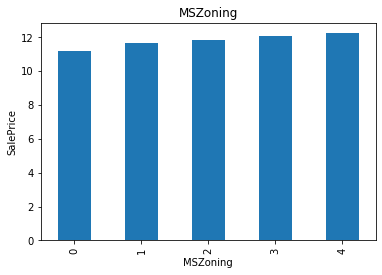

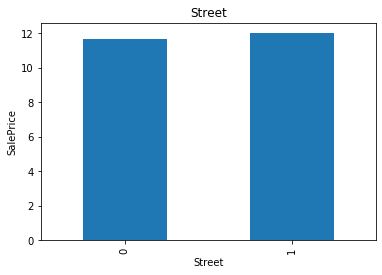

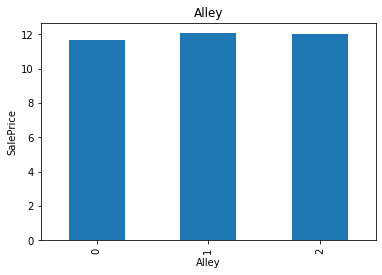

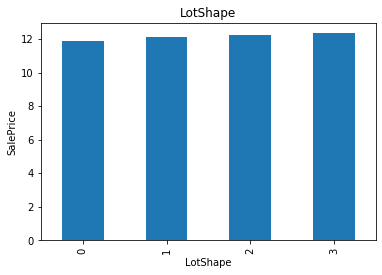

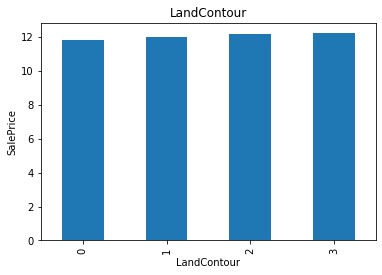

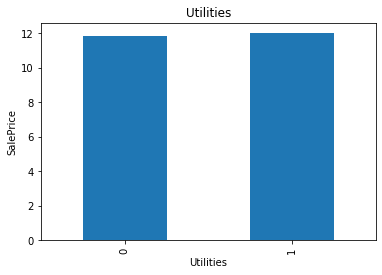

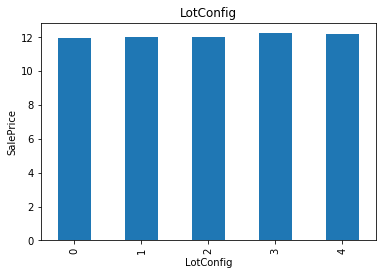

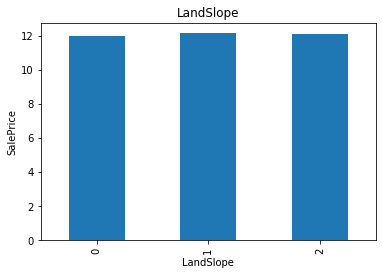

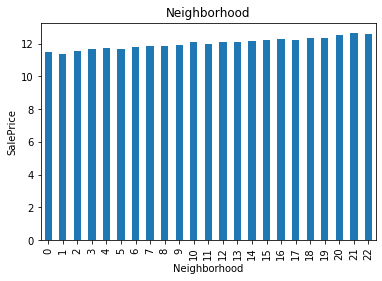

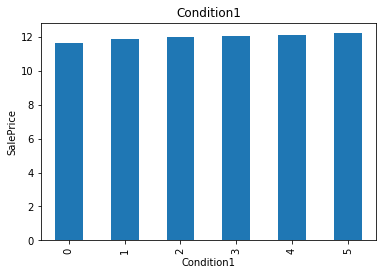

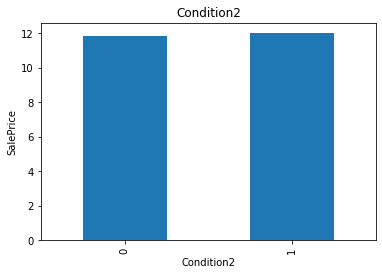

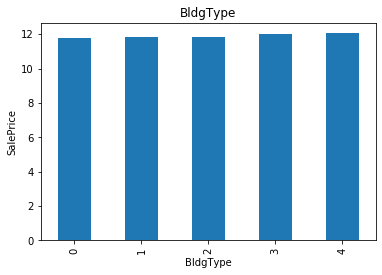

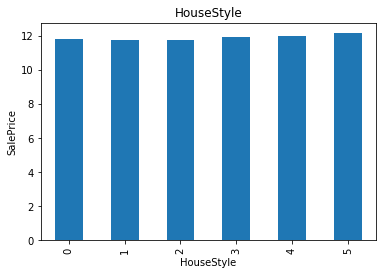

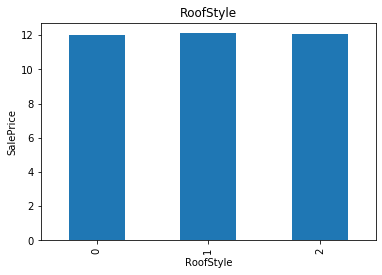

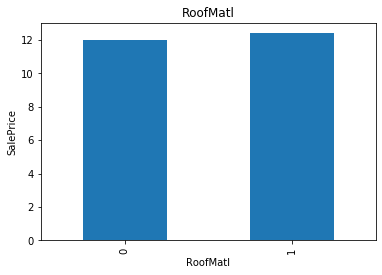

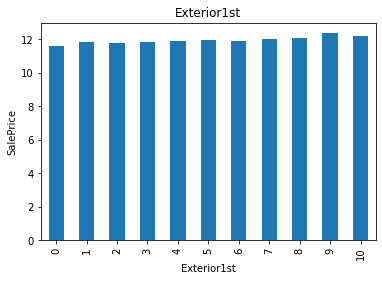

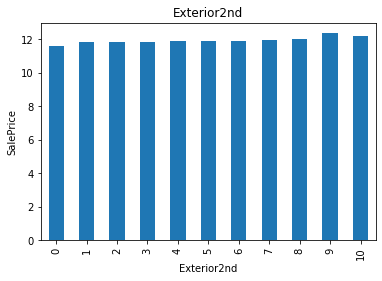

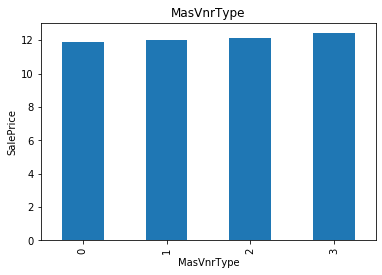

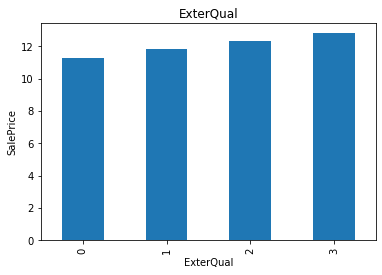

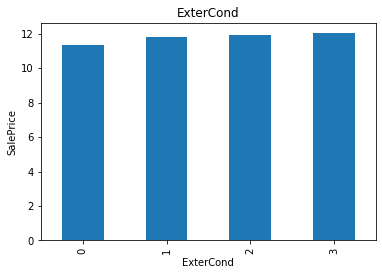

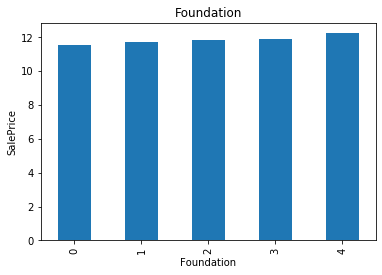

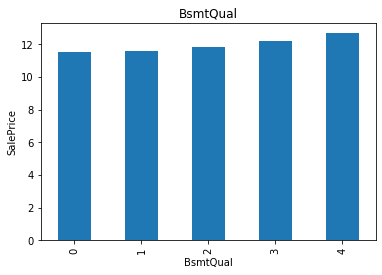

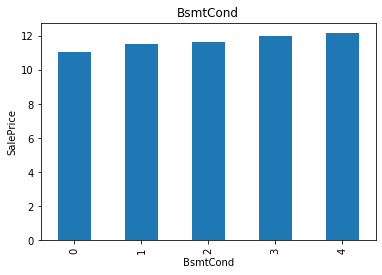

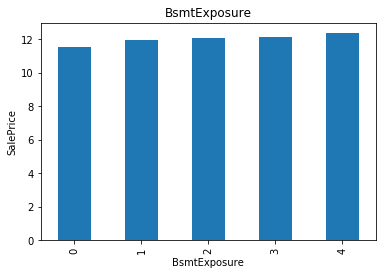

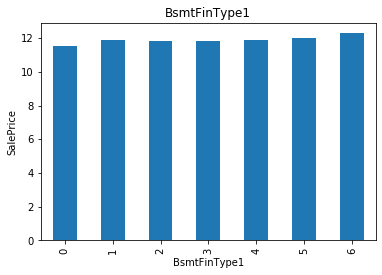

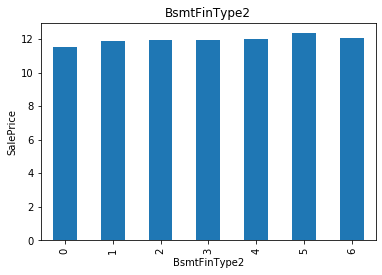

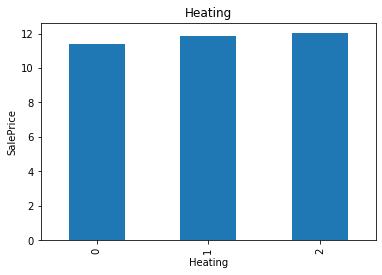

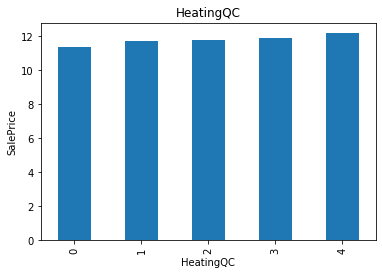

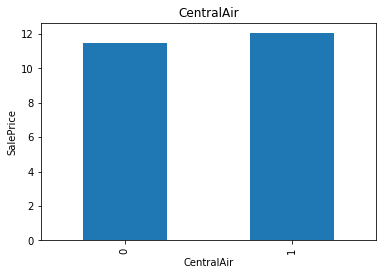

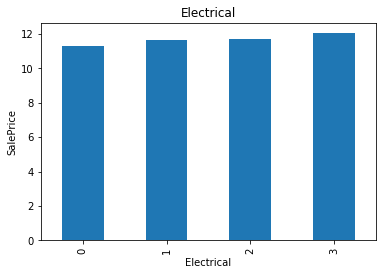

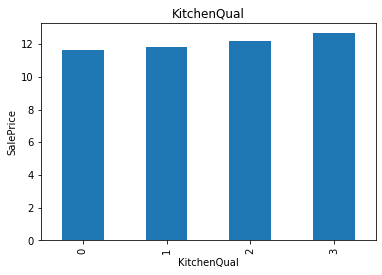

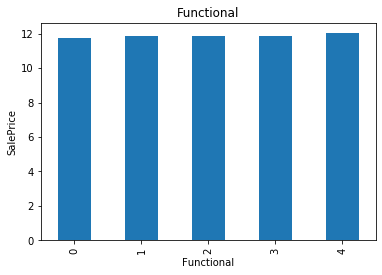

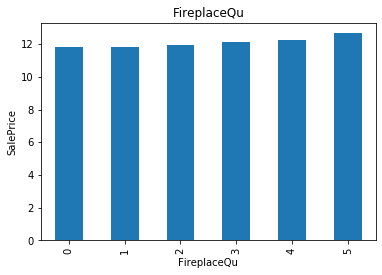

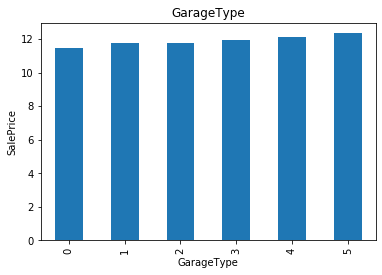

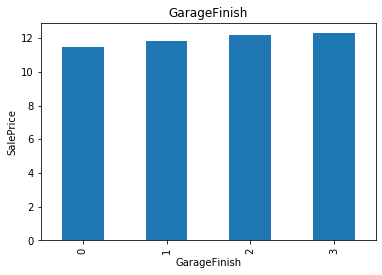

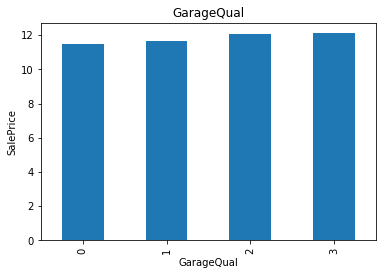

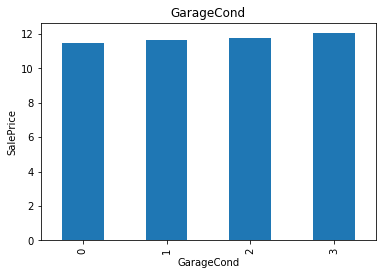

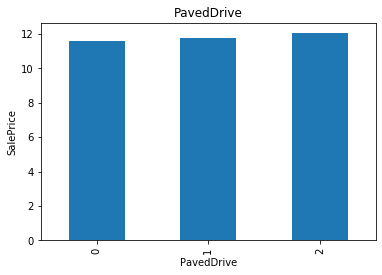

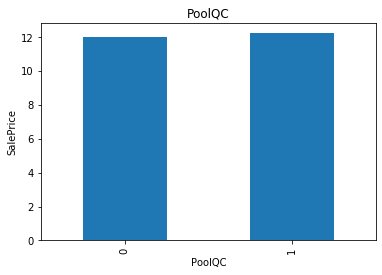

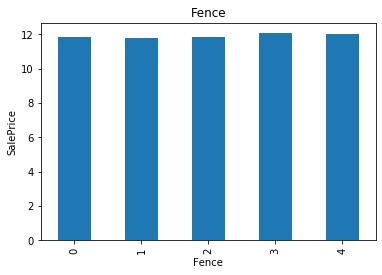

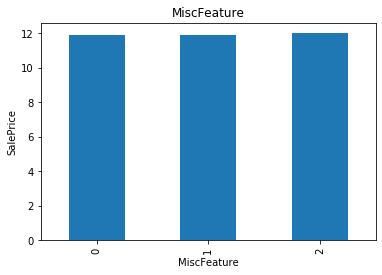

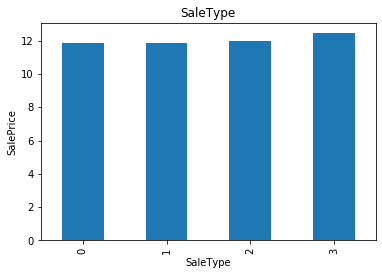

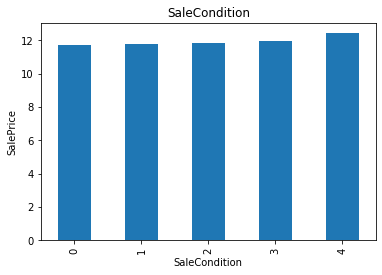

In [42]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

### Feature Scaling

For use in linear models, features need to be either scaled or normalised. We will scale features between the min and max values:

In [43]:
train_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]
len(train_vars)

82

In [44]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

In [45]:
X_train.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0   931  12.211060    0.000000      0.75     0.461171  0.377048     1.0   
1   657  11.887931    0.000000      0.75     0.456066  0.399443     1.0   
2    46  12.675764    0.588235      0.75     0.394699  0.347082     1.0   
3  1349  12.278393    0.000000      0.75     0.388581  0.493677     1.0   
4    56  12.103486    0.000000      0.75     0.577658  0.402702     1.0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    1.0  0.333333     1.000000        1.0        0.0        0.0   
1    1.0  0.333333     0.333333        1.0        0.0        0.0   
2    1.0  0.000000     0.333333        1.0        0.0        0.0   
3    1.0  0.666667     0.666667        1.0        0.0        0.0   
4    1.0  0.333333     0.333333        1.0        0.0        0.0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0      0.863636         0.4         1.0      0.75         0.6     0.777778   
1      0.363636         0.4         1.0      0.75         0.6     0.444444   
2      0.954545         0.4         1.0      1.00         0.6     0.888889   
3      0.454545         0.4         1.0      0.75         0.6     0.666667   
4      0.363636         0.4         1.0      0.75         0.6     0.555556   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0         0.50   0.014706      0.049180        0.0       0.0          1.0   
1         0.75   0.360294      0.049180        0.0       0.0          0.6   
2         0.50   0.036765      0.098361        1.0       0.0          0.3   
3         0.50   0.066176      0.163934        0.0       0.0          1.0   
4         0.50   0.323529      0.737705        0.0       0.0          0.6   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          1.0    0.000000     0.00000   0.666667        1.0         1.0   
1          0.6    0.666667     0.03375   0.666667        1.0         0.5   
2          0.2    0.666667     0.25750   1.000000        1.0         1.0   
3          1.0    0.000000     0.00000   0.666667        1.0         1.0   
4          0.7    0.666667     0.17000   0.333333        1.0         0.5   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0      0.75      0.75          0.75      1.000000    0.002835      0.666667   
1      0.50      0.75          0.25      0.666667    0.142807      0.666667   
2      1.00      0.75          0.25      1.000000    0.080794      0.666667   
3      0.75      0.75          1.00      1.000000    0.255670      0.666667   
4      0.50      0.75          0.25      0.333333    0.086818      0.666667   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0   0.673479     0.239935      1.0       1.00         1.0   
1         0.0   0.114724     0.172340      1.0       1.00         1.0   
2         0.0   0.601951     0.286743      1.0       1.00         1.0   
3         0.0   0.018114     0.242553      1.0       1.00         1.0   
4         0.0   0.434278     0.233224      1.0       0.75         1.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         1.0  0.559760       0.0           0.0   0.523250      0.000000   
1         1.0  0.434539       0.0           0.0   0.406196      0.333333   
2         1.0  0.627205       0.0           0.0   0.586296      0.333333   
3         1.0  0.566920       0.0           0.0   0.529943      0.333333   
4         1.0  0.549026       0.0           0.0   0.513216      0.000000   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0  0.666667       0.0         0.375      0.333333     0.666667   
1           0.0  0.333333       0.5         0.375      0.333333     0.666667   
2           0.0  0.666667       0.0         0.250      0.333333     1.000000   
3           0.0  0.666667       0.0         0.375      0.333333  

In [46]:
# capture the target
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
X_test.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [47]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge(random_state=0)

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=0,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [48]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08832018473923439


In [49]:
alpha = 0.001
ridge = Ridge(alpha=alpha, random_state=0)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [50]:
ridge.coef_

array([-1.21649070e-02,  9.08621805e-02, -8.12740374e-03,  2.54319211e-01,
        1.81074941e-01,  2.74535178e-02, -3.24861658e-03,  5.13538904e-02,
        3.44162876e-01,  1.87736851e-02, -6.40522634e-03,  2.25722409e-01,
        4.38638793e-02,  1.00572013e-01, -2.69516632e-02, -1.33731323e-02,
        4.82173184e-01,  3.01691755e-01, -8.39097505e-02, -3.28819102e-02,
        4.77421303e-03, -6.81058805e-02,  8.29836205e-02, -4.70068473e-02,
       -5.07991021e-03,  5.95200993e-02,  3.37413460e-02,  5.18057401e-02,
        4.32465956e-02,  7.02027539e-02,  2.69330611e-02,  4.86719859e-02,
       -6.90584925e-03,  1.17890379e-01,  3.33388572e-02,  4.01187388e-02,
       -4.48396366e-02,  1.02777182e-01,  2.40142702e-02,  4.25263641e-02,
        4.60471927e-02, -2.93026987e-02,  5.21827901e-01,  1.33282964e-01,
        7.21704779e-02,  6.39694910e-01,  1.48546774e-01,  5.46237834e-02,
        5.74671418e-02,  3.95272824e-02, -4.98205150e-02, -1.92428848e-01,
        7.20147187e-02,  

In [51]:
# use twice the optimum alpha for subjective question
alpha = 0.002
ridge = Ridge(alpha=alpha, random_state=0)
ridge.fit(X_train, y_train)

Ridge(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [52]:
ridge.coef_

array([-1.24968020e-02,  9.09264981e-02, -8.88632789e-03,  2.54250235e-01,
        1.80838809e-01,  2.74866155e-02, -3.42092404e-03,  5.14524545e-02,
        3.44311127e-01,  1.88117177e-02, -6.52419794e-03,  2.25947571e-01,
        4.39300219e-02,  1.00251365e-01, -2.70302250e-02, -1.35181390e-02,
        4.81746215e-01,  3.01901546e-01, -8.36480391e-02, -3.26563770e-02,
        4.88627460e-03, -6.78300701e-02,  8.32293154e-02, -4.71703694e-02,
       -5.15077646e-03,  5.97989478e-02,  3.39932977e-02,  5.18105498e-02,
        4.31113005e-02,  7.07301997e-02,  2.73335641e-02,  4.88332937e-02,
       -6.87451361e-03,  1.14854064e-01,  3.37840987e-02,  3.96139935e-02,
       -4.55062037e-02,  9.96157953e-02,  2.40157613e-02,  4.25365776e-02,
        4.60337918e-02, -2.92680998e-02,  5.21800389e-01,  1.32054184e-01,
        7.13042629e-02,  6.42027759e-01,  1.48642707e-01,  5.42952388e-02,
        5.73592901e-02,  3.95234164e-02, -4.90246993e-02, -1.92042958e-01,
        7.21506533e-02,  

In [53]:
# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9180897567194639
0.8748768338202149


In [54]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso(random_state=0)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.08899913096716708


In [56]:
# list of alphas to tune
params = {'alpha': [0.00009, 0.000095, 0.0001, 0.00015, 0.0002]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [9e-05, 9.5e-05, 0.0001, 0.00015, 0.0002]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [57]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0002}
-0.08888431522347155


In [62]:
sel_ = SelectFromModel(Lasso(alpha=0.0002, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.0002, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [63]:
sum(sel_.get_support())

66

In [64]:
selected_feat = X_train.columns[(sel_.get_support())]
X_train_lasso = X_train[selected_feat]
X_test_lasso = X_test[selected_feat]
alpha = 0.0002
lasso = Lasso(alpha=alpha, random_state=0)
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
# predict
y_train_pred = lasso.predict(X_train_lasso)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_lasso)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9118751622521167
0.8862752252036703


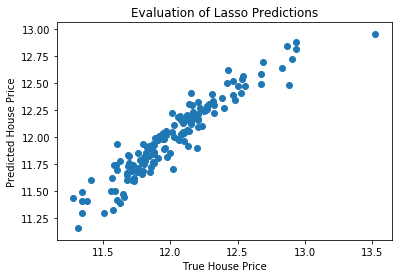

In [66]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, y_test_pred);
plt.xlabel('True House Price');
plt.ylabel('Predicted House Price');
plt.title('Evaluation of Lasso Predictions');

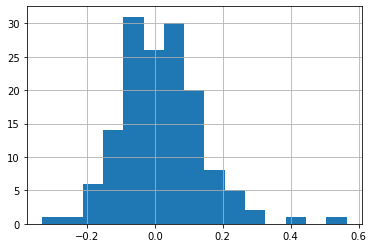

In [67]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - y_test_pred
errors.hist(bins=15);

In [68]:
features = X_train_lasso.columns[(lasso.coef_ != 0).ravel().tolist()]

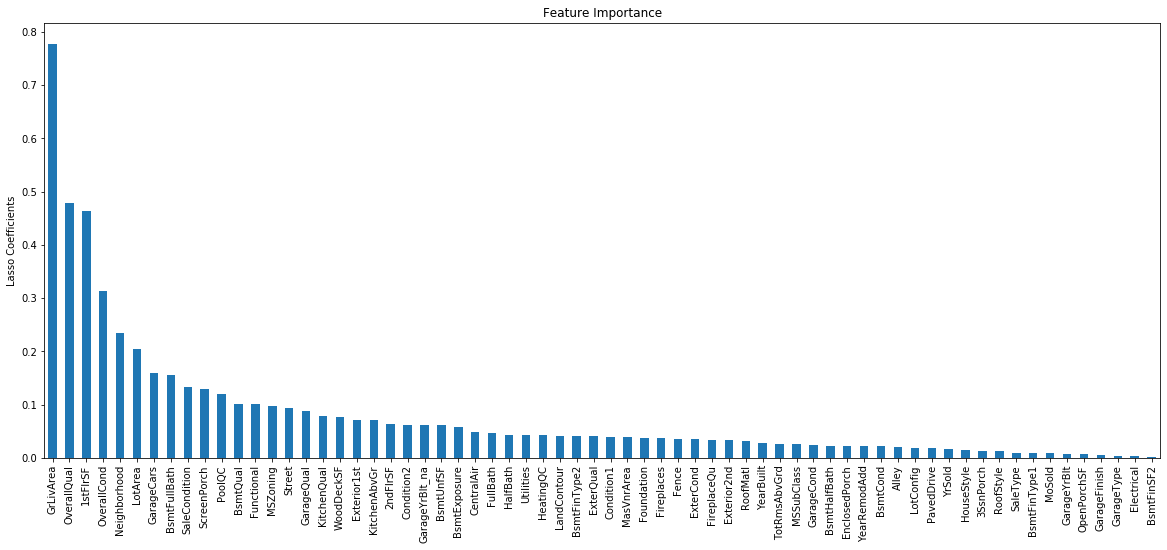

In [69]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lasso.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(20,8));
plt.ylabel('Lasso Coefficients');
plt.title('Feature Importance');

The above graph shows the feature importance with respect to the lasso regression coefficients.